In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Input Singal

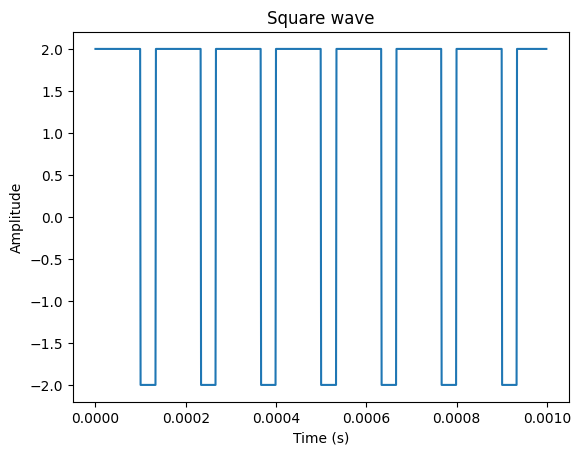

In [33]:
def generate_square_wave(frequency, amplitude, duty_cycle, duration=1.0e-3):
    t = np.linspace(0, duration, 1000, endpoint=False)
    square_wave = amplitude * signal.square(2 * np.pi * frequency * t, duty=duty_cycle)
    return t, square_wave

# Example usage:
t, square_wave = generate_square_wave(7.5e3, 2, 0.75)

# Plot the square wave
plt.plot(t, square_wave)
plt.title('Square wave')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Anti-Aliasing Filter

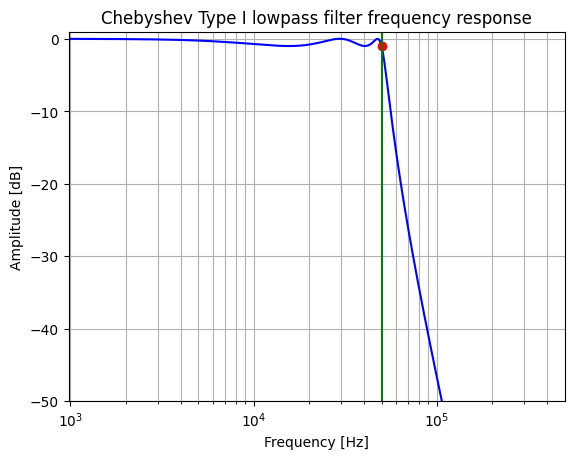

In [34]:
def design_cheby1_filter(fp=50e3, fa=2*50e3, Ap=1, Aa=40, fs=1e6):
    # Normalize frequencies to Nyquist frequency (fs/2)
    wp = fp / (fs/2)
    wa = fa / (fs/2)

    # Design Chebyshev Type I filter
    N, Wn = signal.cheb1ord(wp, wa, Ap, Aa)
    b, a = signal.cheby1(N, Ap, Wn, 'low')

    w, h = signal.freqz(b, a, fs=fs)

    # Plot magnitude response
    plt.figure()
    plt.semilogx(w, 20 * np.log10(abs(h)), 'b')  # Change to semilogx
    plt.semilogx(Wn*fs/2, -Ap, 'ro')  # Change to semilogx
    plt.title('Chebyshev Type I lowpass filter frequency response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.axvline(Wn*fs/2, color='green')  # cutoff frequency
    plt.ylim(-50, 1)
    # plt.xlim(0, 90e3)
    plt.show()

    return b, a

# Design the filter
b, a = design_cheby1_filter()

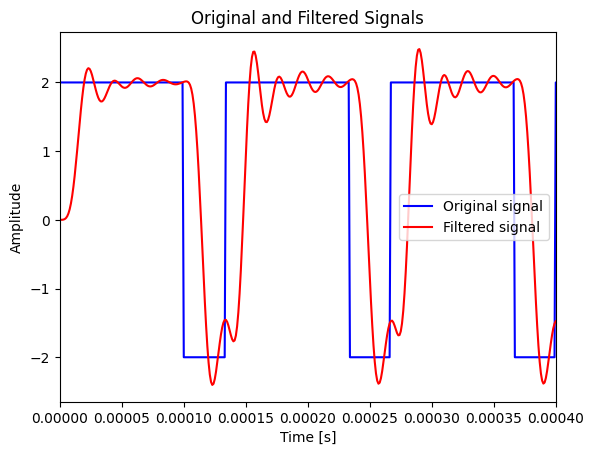

In [38]:
# Apply the filter to the square wave
filtered_square_wave = signal.lfilter(b, a, square_wave)

# Plot the original signal in blue
plt.plot(t, square_wave, 'b', label='Original signal')

# Plot the filtered signal in red
plt.plot(t, filtered_square_wave, 'r', label='Filtered signal')

# Add a legend
plt.legend()

# Add title and labels
plt.title('Original and Filtered Signals')
plt.xlabel('Time [s]')
plt.xlim(0, 0.4e-3)
plt.ylabel('Amplitude')

# Display the plot
plt.show()

# Sample and Hold

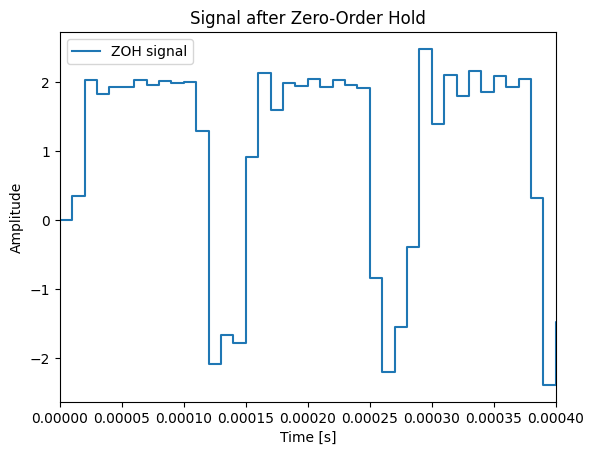

In [61]:
# Calculate the number of samples
fs = 100e3
num_samples = int(t[-1] * fs)

# Create an array of sampling instants
sampling_instants = np.arange(num_samples) / fs

# Create a new signal that represents the value of the filtered_square_wave at each sampling instant
zoh_signal = np.interp(sampling_instants, t, filtered_square_wave)

# Plot the held signal with discrete jumps
plt.plot(sampling_instants, zoh_signal, drawstyle='steps-post', label='ZOH signal')
plt.title('Signal after Zero-Order Hold')
plt.xlabel('Time [s]')
plt.xlim(0, 0.4e-3)
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
#Calculate the hold factor
hold_factor = int(fs / resample_rate)

# Create an array of time points for the ZOH signal
t_zoh = np.arange(0, t[-1], 1/fs)

# Create an array that represents the ZOH version of the signal
zoh_signal = np.zeros_like(t_zoh)

# Assign the value of the filtered signal at each sampling instant to the ZOH signal
for i in range(len(t)):
    zoh_signal[(t_zoh >= t[i]) & (t_zoh < t[i] + 1/fs)] = filtered_square_wave[i]

# Recovering Filter